NAND Results:
Input: [0 0], Expected: 1, Predicted: 1
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 1
Input: [1 1], Expected: 0, Predicted: 0

XOR Results:
Input: [0 0], Expected: 0, Predicted: 1
Input: [0 1], Expected: 1, Predicted: 0
Input: [1 0], Expected: 1, Predicted: 0
Input: [1 1], Expected: 0, Predicted: 0


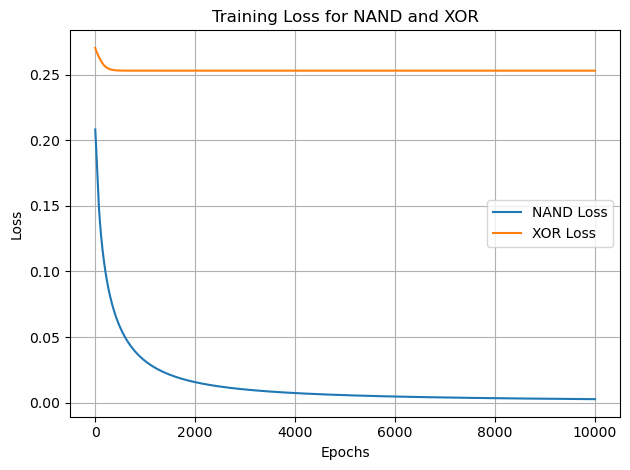

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Perceptron class using sigmoid activation
class SigmoidPerceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return sigmoid(weighted_sum)

    def train(self, inputs, targets, epochs=10000):
        loss_history = []
        for epoch in range(epochs):
            total_error = 0
            for x, y in zip(inputs, targets):
                output = self.predict(x)
                error = y - output
                total_error += error ** 2

                # Backpropagation
                d_output = error * sigmoid_derivative(output)
                self.weights += self.learning_rate * d_output * x
                self.bias += self.learning_rate * d_output

            loss_history.append(total_error / len(inputs))
        return loss_history

# Logic gate inputs and outputs
logic_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
nand_outputs = np.array([1, 1, 1, 0])  # NAND
xor_outputs = np.array([0, 1, 1, 0])   # XOR

# Train for NAND
nand_perceptron = SigmoidPerceptron(2)
nand_loss = nand_perceptron.train(logic_inputs, nand_outputs)
nand_predictions = [round(nand_perceptron.predict(x)) for x in logic_inputs]

# Train for XOR
xor_perceptron = SigmoidPerceptron(2)
xor_loss = xor_perceptron.train(logic_inputs, xor_outputs)
xor_predictions = [round(xor_perceptron.predict(x)) for x in logic_inputs]

# Print results
print("NAND Results:")
for i in range(len(logic_inputs)):
    print(f"Input: {logic_inputs[i]}, Expected: {nand_outputs[i]}, Predicted: {nand_predictions[i]}")

print("\nXOR Results:")
for i in range(len(logic_inputs)):
    print(f"Input: {logic_inputs[i]}, Expected: {xor_outputs[i]}, Predicted: {xor_predictions[i]}")

# Plot training losses
plt.plot(nand_loss, label='NAND Loss')
plt.plot(xor_loss, label='XOR Loss')
plt.title('Training Loss for NAND and XOR')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
